In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import yfinance as yf
import pandas as pd
df = yf.download('SBIN.BO', start='2010-01-01', end=pd.to_datetime('today').strftime('%Y-%m-%d'))
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO,SBIN.BO
Date,,,,,
2010-01-04,88.721901,89.008397,87.692050,87.692050,3292160
2010-01-05,88.733543,89.637562,87.717244,87.843071,3164620
2010-01-06,89.242661,89.624015,88.447041,89.043273,4354310
2010-01-07,88.760628,89.352984,88.423799,89.352984,2545580
2010-01-08,88.543839,89.085868,88.354133,89.008431,2654490


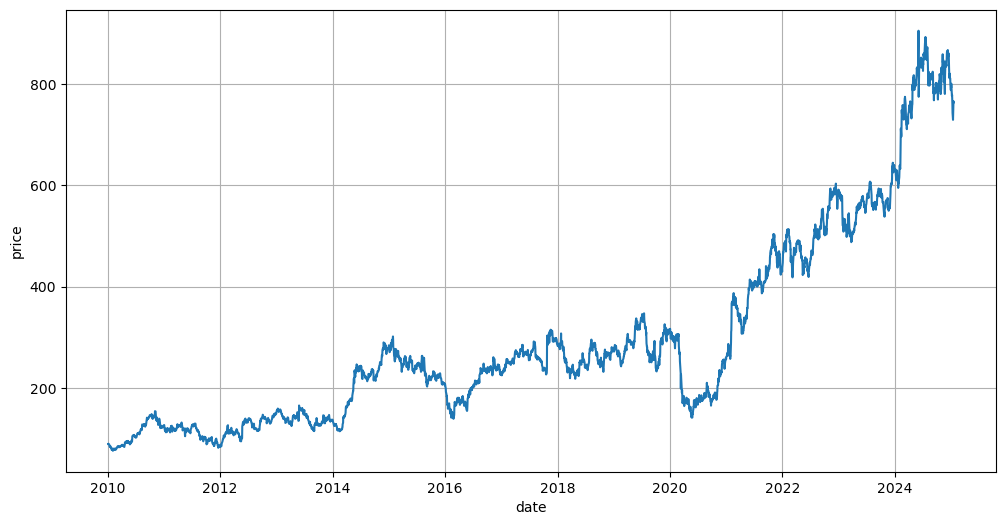

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.xlabel("date")
plt.ylabel("price")
plt.grid(True)

In [5]:
df=df.dropna()
df.shape

(3687, 5)

In [6]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,SBIN.BO
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2025-01-13,810.949996
2025-01-14,810.306496
2025-01-15,809.709996


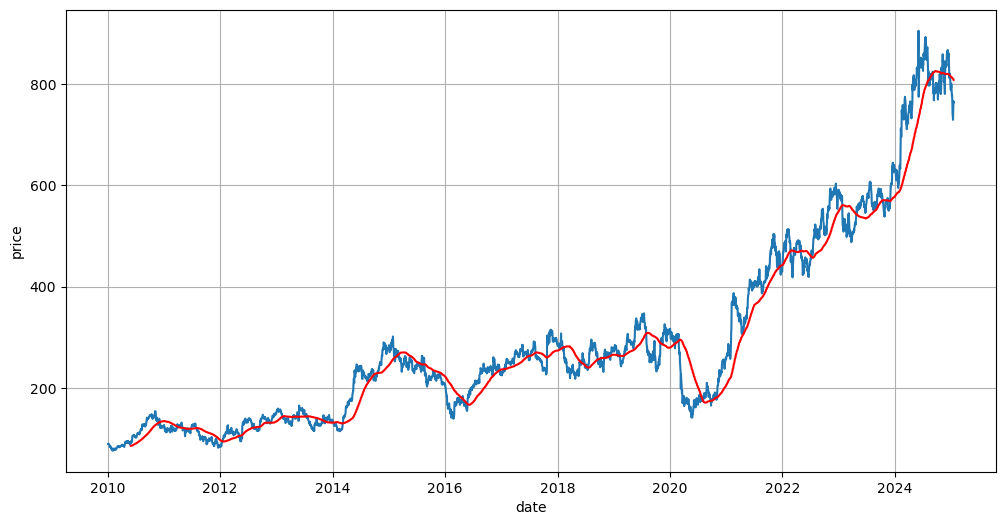

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100 , 'r')
plt.xlabel("date")
plt.ylabel("price")
plt.grid(True)

In [8]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,SBIN.BO
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2025-01-13,811.184301
2025-01-14,811.331566
2025-01-15,811.545704


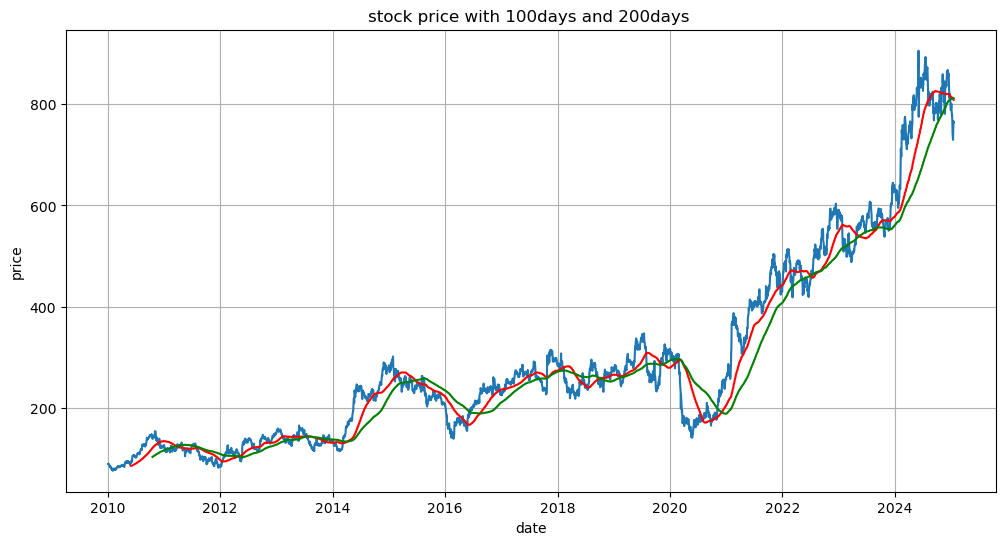

In [9]:
plt.figure(figsize=(12,6))
plt.title("stock price with 100days and 200days ")
plt.plot(df['Close'])
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'g')
plt.xlabel("date")
plt.ylabel("price")
plt.grid(True)

In [10]:
training_data=pd.DataFrame(df['Close'][:int(len(df)*0.70)])
testing_data=pd.DataFrame(df['Close'][int(len(df)*0.70):])
print(training_data.shape)
print(testing_data.shape)
# type(testing_data)  ->dataFrame

(2580, 1)
(1107, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array=scaler.fit_transform(training_data)

In [14]:
xtrain=[]
ytrain=[]
for i in range(100,data_training_array.shape[0]):
      xtrain.append(data_training_array[i-100:i])
      ytrain.append(data_training_array[i,0])
xtrain,ytrain=np.array(xtrain),np.array(ytrain)

In [16]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [57]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - loss: 901921344.0000
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0317
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0247
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0178
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0128
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0120
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0098
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0102
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0077
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0076
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0076
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0075
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0070
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0068
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0

In [74]:
model.save('stock.h5')

In [75]:
model.save('stock.keras')

In [23]:
model=load_model('stock.keras')

In [24]:
last_100_days = training_data.tail(100)
training_data.head()

Ticker,SBIN.BO
Date,
2010-01-04,88.721901
2010-01-05,88.733543
2010-01-06,89.242661
2010-01-07,88.760628
2010-01-08,88.543839


In [25]:
past_100_days=pd.DataFrame(testing_data[-100:0])
test_df=pd.DataFrame(testing_data)
final_df=pd.concat([test_df,past_100_days],ignore_index=True)

In [26]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(1107, 1)

In [27]:
xtest=[]
ytest=[]
for i in range(100,input_data.shape[0]):
    xtest.append(input_data[i-100:i])
    ytest.append(input_data[i,0])
xtest,ytest=np.array(xtest),np.array(ytest)

In [28]:
xtest,ytest=np.array(xtest),np.array(ytest)

In [29]:
print(xtest.shape)
print(ytest.shape)

(1007, 100, 1)
(1007,)


In [30]:
ypred=model.predict(xtest)
ypred.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step


(1007, 1)

In [31]:
scaler.scale_

array([0.00134911])

In [32]:
scale_factor=1/0.00134911
ypred=ypred*scale_factor
ytest=ytest*scale_factor

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(ytest,ypred)
mean_squared_error(ytest,ypred)
print("r2_score",r2_score(ytest,ypred))
print("mean_squared_error",mean_squared_error(ytest,ypred))

r2_score 0.7507186095547006
mean_squared_error 6523.791777368061


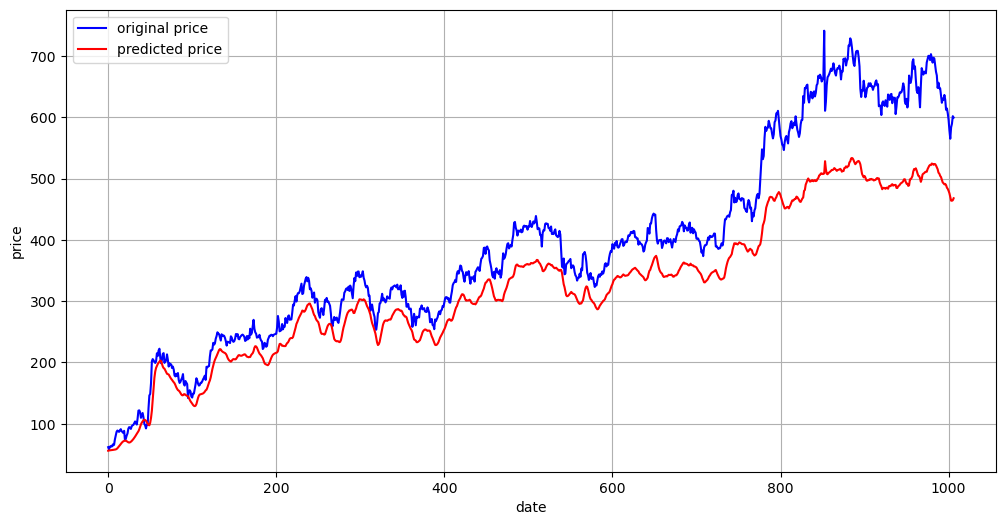

In [34]:
plt.figure(figsize=(12,6))
plt.plot(ytest,'b',label='original price')
plt.plot(ypred,'r',label='predicted price')
plt.xlabel("date")
plt.ylabel("price")
plt.legend()
plt.grid(True)
plt.show()